In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
data=pd.read_csv(r"C:\Users\KIIT0001\Downloads\Bengaluru_House_Data.csv")

In [210]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [212]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [216]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [218]:
for coloumn in data.columns:
    print(data[coloumn].value_counts())

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          

In [220]:
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)


In [222]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [224]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [226]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [230]:
for features in data.columns:
    print(data[features].value_counts())

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom     

In [232]:
data.fillna({'location':data['location'].mode()[0],
             'size':data['size'].mode()[0],
             'total_sqft':data['total_sqft'].mode()[0],
             'bath':data['bath'].median()},inplace=True)

In [234]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [236]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [238]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [239]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [240]:
data[data['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [244]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [245]:
  def convert_range(x):
      temp=x.split('-')
      if len(temp)==2:
         return (float(temp[0]) + float(temp[1])) / 2
      try:
          return float(x)
      except:
         return None


In [248]:
data['total_sqft']=data['total_sqft'].apply(convert_range)

In [250]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 572.5+ KB


In [254]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']

In [256]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [258]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [260]:
data['location'].value_counts()

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [262]:
data['location']=data['location'].apply(lambda x: x.strip())
location_count=data['location'].value_counts()
        

In [264]:
location_count

location
Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [266]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [268]:
data['location']=data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [270]:
data['location'].value_counts()

location
other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [272]:
data['sqft_per_bhk']=data['total_sqft']/data['bhk']

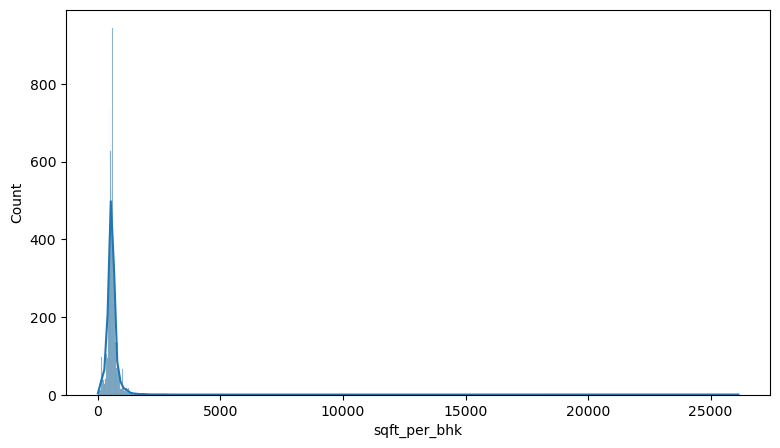

In [274]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data['sqft_per_bhk'],kde=True)
plt.show()

In [275]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04,13274.000000
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03,575.074878
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05,388.205175
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02,0.250000
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03,473.333333
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03,552.500000
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03,625.000000
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07,26136.000000


In [276]:
 data=data[data['sqft_per_bhk']>=300]

In [277]:
data.shape

(12530, 8)

In [278]:
 #Now we will find the z score of 1 
data['price_per_sqft_zscore'] = (
    data['price_per_sqft'] -
    data.groupby('location')['price_per_sqft'].transform('mean')
) / data.groupby('location')['price_per_sqft'].transform('std')
data['price_per_sqft_zscore']

0       -0.062810
1        0.157919
2        0.010416
3       -0.514259
4       -0.767655
           ...   
13315    0.158303
13316    0.567915
13317    0.305052
13318    1.250471
13319   -0.822387
Name: price_per_sqft_zscore, Length: 12530, dtype: float64

In [279]:
data=data[(data['price_per_sqft_zscore']<=1.0) & (data['price_per_sqft_zscore']>-1.0)]

In [280]:
data.shape

(10350, 9)

In [281]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk,price_per_sqft_zscore
count,10350.000000,10350.000000,10350.000000,10350.000000,10350.000000,10350.000000,10350.000000
mean,1508.646058,2.472560,91.347418,2.575556,5660.751992,584.078456,-0.171935
std,879.853598,0.980519,86.425645,0.898481,2271.111971,216.525945,0.462102
min,300.000000,1.000000,10.000000,1.000000,1250.000000,300.000000,-0.999084
25%,1110.000000,2.000000,49.000000,2.000000,4239.794174,496.500000,-0.517154
50%,1286.000000,2.000000,67.000000,2.000000,5175.519668,562.500000,-0.254953
75%,1650.000000,3.000000,100.000000,3.000000,6431.808627,625.000000,0.131533
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922,10030.000000,0.998904


In [282]:
  def bhk_outlier_remover(df):
    
    remove_index = []

    # 1. Loop over each location
    for location, loc_df in df.groupby('location'):

        bhk_stats = {}

        # 2. Calculate stats for each BHK
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': bhk_df.price_per_sqft.mean(),
                'count': bhk_df.shape[0]
            }

        # 3. Compare current BHK with previous BHK
        for bhk, bhk_df in loc_df.groupby('bhk'):

            prev_stats = bhk_stats.get(bhk-1)

            if prev_stats and prev_stats['count'] > 5:
                
                # 4. Remove if price less than lower BHK mean
                bad_rows = bhk_df[
                    bhk_df.price_per_sqft < prev_stats['mean']
                ].index

                remove_index.extend(bad_rows)

    return df.drop(remove_index)


In [283]:
data=bhk_outlier_remover(data)

In [293]:
data.shape

(7415, 9)

In [294]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk,price_per_sqft_zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.0,-0.062810
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.0,0.157919
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.0,0.010416
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.0,-0.514259
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.0,-0.767655


In [296]:
data.drop(columns=['size','price_per_sqft','sqft_per_bhk','price_per_sqft_zscore'],inplace=True)

In [302]:
data.to_csv('Cleaned_data.csv')

In [304]:
#Now we calculate the number of numerical features
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print('The number of nummerical features in the cleaned dataset is : ',len(num_features))  

The number of nummerical features in the cleaned dataset is :  4


In [306]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
print("The number of categorical feautres in the cleaned dataset is: ",len(cat_features))

The number of categorical feautres in the cleaned dataset is:  1


In [308]:
data.describe

<bound method NDFrame.describe of                        location  total_sqft  bath   price  bhk
0      Electronic City Phase II      1056.0   2.0   39.07    2
1              Chikka Tirupathi      2600.0   5.0  120.00    4
2                   Uttarahalli      1440.0   2.0   62.00    3
3            Lingadheeranahalli      1521.0   3.0   95.00    3
4                      Kothanur      1200.0   2.0   51.00    2
...                         ...         ...   ...     ...  ...
13313               Uttarahalli      1345.0   2.0   57.00    3
13314         Green Glen Layout      1715.0   3.0  112.00    3
13316                     other      3600.0   5.0  400.00    4
13317     Raja Rajeshwari Nagar      1141.0   2.0   60.00    2
13319              Doddathoguru       550.0   1.0   17.00    1

[7415 rows x 5 columns]>

In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7415 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7415 non-null   object 
 1   total_sqft  7415 non-null   float64
 2   bath        7415 non-null   float64
 3   price       7415 non-null   float64
 4   bhk         7415 non-null   int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 318.6+ KB


In [312]:
data.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [314]:
X=data.drop(columns=['price'])
y=data['price']

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [318]:
numerical_features=X.select_dtypes(exclude="object").columns
categorical_features=["location"]
num_transformer=StandardScaler()
cat_transformer=OneHotEncoder(drop="first")
preprocceser=ColumnTransformer([("OneHotEncoder",cat_transformer,categorical_features),("Standardscaler",num_transformer,numerical_features)],remainder="passthrough")



In [320]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [322]:
X_train.shape

(5932, 4)

In [332]:
rf_params={"n_estimators":[100,200,300,500],
           "max_depth":[None,10,20,30,40],
           "min_samples_split":[2,5,10,20],
           "min_samples_leaf":[1,2,4,8],
           "max_features":['sqrt','log2',None]
          }
model_param={}
random_cv_model=[("RandomForest",RandomForestRegressor(),rf_params)]

In [334]:
from sklearn.model_selection import RandomizedSearchCV

In [336]:
from sklearn.pipeline import Pipeline
random_model=RandomForestRegressor(n_estimators=200,max_depth=None,min_samples_leaf=1,max_features='log2',min_samples_split=2)
final_pipeline = Pipeline([
    ("preprocceser", preprocceser),
    ("model", random_model)
])
final_pipeline.fit(X_train, y_train)
y_random_pred = final_pipeline.predict(X_test)
mae, mse, r2 = evaluate_model(y_test, y_random_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

        

Mean Absolute Error:  15.633678466609926
Mean Squared Error:  1088.471031755054
R2 Score:  0.8701542354433


In [337]:
import joblib
joblib.dump(final_pipeline,"final_house_price_model.pkl")

['final_house_price_model.pkl']